# Temporal dynamics of risk 
##### Author: Omid Emamjomehzadeh (https://www.omidemam.com/)
##### Supervisor: Dr. Omar Wani (https://engineering.nyu.edu/faculty/omar-wani)
##### Hydrologic Systems Group @NYU (https://www.omarwani.com/)

In [1]:
# Run by geo_plot_env

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
from watermark import watermark
import datetime

In [3]:
import warnings
# Suppress the specific RuntimeWarning
warnings.filterwarnings("ignore")
# Suppress all UserWarnings, including PerformanceWarnings
warnings.simplefilter('ignore', category=UserWarning)

# Sankey plot

In [4]:
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq.xlsx'
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq_UL_LL.xlsx'
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq_wet_dry.xlsx'
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq_2030_2100.xlsx'
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq_2030_2100.xlsx'
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq_2030_2100_future_rainandQ.xlsx'
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq_2030_2100_future_rain_LU_Q.xlsx'
merged_culvert=pd.read_excel(excel_output_file)

In [5]:
%%time
# calculates return periods up t0 100-years
# calculate the return periods and their class
def assign_return_period(row):
    if row['Q'] < row['Q_2']:
        return pd.Series([2, '0-2'])
    elif row['Q'] < row['Q_5']:
        return pd.Series([5, '2-5'])
    elif row['Q'] < row['Q_10']:
        return pd.Series([10, '5-10'])
    elif row['Q'] < row['Q_25']:
        return pd.Series([25, '10-25'])
    elif row['Q'] < row['Q_50']:
        return pd.Series([50, '25-50'])
    elif row['Q'] < row['Q_100']:
        return pd.Series([100, '50-100'])
    elif row['Q'] < row['Q_200']:
        return pd.Series([200, '100-$∞$'])
    elif row['Q'] < row['Q_500']:
        return pd.Series([200, '100-$∞$'])
    elif row['Q'] < row['Q_1000']:
        return pd.Series([200, '100-$∞$'])
    else:
        return pd.Series([200, '100-$∞$'])

def assign_return_period_c(row):
    if row['average_Q_maxhw'] < row['Q_2']:
        return pd.Series([2, '0-2'])
    elif row['average_Q_maxhw'] < row['Q_5']:
        return pd.Series([5, '2-5'])
    elif row['average_Q_maxhw'] < row['Q_10']:
        return pd.Series([10, '5-10'])
    elif row['average_Q_maxhw'] < row['Q_25']:
        return pd.Series([25, '10-25'])
    elif row['average_Q_maxhw'] < row['Q_50']:
        return pd.Series([50, '25-50'])
    elif row['average_Q_maxhw'] < row['Q_100']:
        return pd.Series([100, '50-100'])
    elif row['average_Q_maxhw'] < row['Q_200']:
        return pd.Series([200, '100-$∞$'])
    elif row['average_Q_maxhw'] < row['Q_500']:
        return pd.Series([200, '100-$∞$'])
    elif row['average_Q_maxhw'] < row['Q_1000']:
        return pd.Series([200, '100-$∞$'])
    else:
        return pd.Series([200, '100-$∞$'])
        
def assign_return_period_c_LL(row):
    if row['average_Q_maxhw'] < row['Q_LL_2']:
        return pd.Series([2, '0-2'])
    elif row['average_Q_maxhw'] < row['Q_LL_5']:
        return pd.Series([5, '2-5'])
    elif row['average_Q_maxhw'] < row['Q_LL_10']:
        return pd.Series([10, '5-10'])
    elif row['average_Q_maxhw'] < row['Q_LL_25']:
        return pd.Series([25, '10-25'])
    elif row['average_Q_maxhw'] < row['Q_LL_50']:
        return pd.Series([50, '25-50'])
    elif row['average_Q_maxhw'] < row['Q_LL_100']:
        return pd.Series([100, '50-100'])
    elif row['average_Q_maxhw'] < row['Q_LL_200']:
        return pd.Series([200, '100-$∞$'])
    elif row['average_Q_maxhw'] < row['Q_LL_500']:
        return pd.Series([200, '100-$∞$'])
    elif row['average_Q_maxhw'] < row['Q_LL_1000']:
        return pd.Series([200, '100-$∞$'])
    else:
        return pd.Series([200, '100-$∞$'])

def assign_return_period_c_UL(row):
    if row['average_Q_maxhw'] < row['Q_UL_2']:
        return pd.Series([2, '0-2'])
    elif row['average_Q_maxhw'] < row['Q_UL_5']:
        return pd.Series([5, '2-5'])
    elif row['average_Q_maxhw'] < row['Q_UL_10']:
        return pd.Series([10, '5-10'])
    elif row['average_Q_maxhw'] < row['Q_UL_25']:
        return pd.Series([25, '10-25'])
    elif row['average_Q_maxhw'] < row['Q_UL_50']:
        return pd.Series([50, '25-50'])
    elif row['average_Q_maxhw'] < row['Q_UL_100']:
        return pd.Series([100, '50-100'])
    elif row['average_Q_maxhw'] < row['Q_UL_200']:
        return pd.Series([200, '100-$∞$'])
    elif row['average_Q_maxhw'] < row['Q_UL_500']:
        return pd.Series([200, '100-$∞$'])
    elif row['average_Q_maxhw'] < row['Q_UL_1000']:
        return pd.Series([200, '100-$∞$'])
    else:
        return pd.Series([200, '100-$∞$'])
        
def assign_return_period_c_condition(row, condition):
    q_val = row['average_Q_maxhw']
    # Build the appropriate Q column names dynamically
    if q_val < row[f'Q_2_{condition}']:
        return pd.Series([2, '0-2'])
    elif q_val < row[f'Q_5_{condition}']:
        return pd.Series([5, '2-5'])
    elif q_val < row[f'Q_10_{condition}']:
        return pd.Series([10, '5-10'])
    elif q_val < row[f'Q_25_{condition}']:
        return pd.Series([25, '10-25'])
    elif q_val < row[f'Q_50_{condition}']:
        return pd.Series([50, '25-50'])
    elif q_val < row[f'Q_100_{condition}']:
        return pd.Series([100, '50-100'])
    elif q_val < row[f'Q_200_{condition}']:
        return pd.Series([200, '100-$∞$'])
    elif q_val < row[f'Q_500_{condition}']:
        return pd.Series([200, '100-$∞$'])
    elif q_val < row[f'Q_1000_{condition}']:
        return pd.Series([200, '100-$∞$'])
    else:
        return pd.Series([200, '100-$∞$'])
        
def assign_return_period_c_future_LU (row, year, secnario):
    q_val = row['average_Q_maxhw']
    if row['average_Q_maxhw'] < row[f'Q_2_{year}_{secnario}_Wet']:
        return pd.Series([2, '0-2'])
    elif row['average_Q_maxhw'] < row[f'Q_5_{year}_{secnario}_Wet']:
        return pd.Series([5, '2-5'])
    elif row['average_Q_maxhw'] < row[f'Q_10_{year}_{secnario}_Wet']:
        return pd.Series([10, '5-10'])
    elif row['average_Q_maxhw'] < row[f'Q_25_{year}_{secnario}_Wet']:
        return pd.Series([25, '10-25'])
    elif row['average_Q_maxhw'] < row[f'Q_50_{year}_{secnario}_Wet']:
        return pd.Series([50, '25-50'])
    elif row['average_Q_maxhw'] < row[f'Q_100_{year}_{secnario}_Wet']:
        return pd.Series([100, '50-100'])
    elif row['average_Q_maxhw'] < row[f'Q_200_{year}_{secnario}_Wet']:
        return pd.Series([200, '100-$∞$'])
    elif row['average_Q_maxhw'] < row[f'Q_500_{year}_{secnario}_Wet']:
        return pd.Series([200, '100-$∞$'])
    elif row['average_Q_maxhw'] < row[f'Q_1000_{year}_{secnario}_Wet']:
        return pd.Series([200, '100-$∞$'])
    else:
        return pd.Series([200, '100-$∞$'])  

def assign_return_period_c_future_rain (row, year, secnario):
    q_val = row['average_Q_maxhw']
    if row['average_Q_maxhw'] < row[f'Q_2_{time}_{scenario}']:
        return pd.Series([2, '0-2'])
    elif row['average_Q_maxhw'] < row[f'Q_5_{time}_{scenario}']:
        return pd.Series([5, '2-5'])
    elif row['average_Q_maxhw'] < row[f'Q_10_{time}_{scenario}']:
        return pd.Series([10, '5-10'])
    elif row['average_Q_maxhw'] < row[f'Q_25_{time}_{scenario}']:
        return pd.Series([25, '10-25'])
    elif row['average_Q_maxhw'] < row[f'Q_50_{time}_{scenario}']:
        return pd.Series([50, '25-50'])
    elif row['average_Q_maxhw'] < row[f'Q_100_{time}_{scenario}']:
        return pd.Series([100, '50-100'])
    else:
        return pd.Series([200, '100-$∞$']) 


def assign_return_period_c_future_rain_LL(row, year, scenario):
    # Convert A2/B2 to rcp85/rcp45
    rcp = 'rcp85' if scenario == 'A2' else 'rcp45'
    q_val = row['average_Q_maxhw']
    
    if q_val < row[f'Q_2_{year}_{scenario}_Wet_fr']:
        return pd.Series([2, '0-2'])
    elif q_val < row[f'Q_5_{year}_{scenario}_Wet_fr']:
        return pd.Series([5, '2-5'])
    elif q_val < row[f'Q_10_{year}_{scenario}_Wet_fr']:
        return pd.Series([10, '5-10'])
    elif q_val < row[f'Q_25_{year}_{scenario}_Wet_fr']:
        return pd.Series([25, '10-25'])
    elif q_val < row[f'Q_50_{year}_{scenario}_Wet_fr']:
        return pd.Series([50, '25-50'])
    elif q_val < row[f'Q_100_{year}_{scenario}_Wet_fr']:
        return pd.Series([100, '50-100'])
    else:
        return pd.Series([200, '100-$∞$'])  
               
# Apply the function
merged_culvert[['RP', 'RP_class']] = merged_culvert.apply(assign_return_period, axis=1)
merged_culvert[['RP_c', 'RP_class_c']] = merged_culvert.apply(assign_return_period_c, axis=1)
merged_culvert[['RP_c_LL', 'RP_class_c_LL']] = merged_culvert.apply(assign_return_period_c_UL, axis=1)
merged_culvert[['RP_c_UL', 'RP_class_c_UL']] = merged_culvert.apply(assign_return_period_c_LL, axis=1)
merged_culvert[['RP_c_dry', 'RP_class_c_dry']] = merged_culvert.apply(lambda row: assign_return_period_c_condition(row, 'dry'), axis=1)
merged_culvert[['RP_c_nor', 'RP_class_c_nor']] = merged_culvert.apply(lambda row: assign_return_period_c_condition(row, 'nor'), axis=1)
# 
for year in [2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]:
    for secnario in ['A1B', 'A2', 'B1', 'B2']:
        merged_culvert[[f'RP_c_{year}_{secnario}', f'RP_class_c_{year}_{secnario}']] = \
            merged_culvert.apply(lambda row: assign_return_period_c_future_LU (row, year, secnario), axis=1)
#
for time in ['2010-2039','2040-2069','2070-2099']:
    for scenario in ['rcp45','rcp85']:
        merged_culvert[[f'RP_c_{time}_{scenario}', f'RP_class_c_{time}_{scenario}']] = \
            merged_culvert.apply(lambda row: assign_return_period_c_future_rain (row, time, secnario), axis=1)
#
for year in [2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]:
    for secnario in ['A2', 'B2']:
        merged_culvert[[f'RP_c_{year}_{secnario}_lr', f'RP_class_c_{year}_{secnario}_lr']] = \
            merged_culvert.apply(lambda row: assign_return_period_c_future_rain_LL (row, year, secnario), axis=1)

CPU times: total: 31.1 s
Wall time: 32.7 s


In [6]:
merged_culvert.replace({'100-$∞$': '100-∞'}, inplace=True)
ordered_classes = ['0-2', '2-5', '5-10', '10-25', '25-50', '50-100', '100-∞']

In [7]:
def make_sankey_for_scenario(scenario, scenario_label, color_map):
    class_labels = ordered_classes
    node_labels = [f"{cls} " for cls in class_labels] + \
                  [f"{cls} " for cls in class_labels] + \
                  [f"{cls} " for cls in class_labels]

    node_x = [0] * len(class_labels) + [0.5] * len(class_labels) + [1] * len(class_labels)
    node_y = list(np.linspace(0, 1, len(class_labels))) * 3

    col_2030 = f'RP_class_c_2030_{scenario}_lr'
    col_2060 = f'RP_class_c_2060_{scenario}_lr'
    col_2090 = f'RP_class_c_2090_{scenario}_lr'

    df = merged_culvert.dropna(subset=[col_2030, col_2060, col_2090])

    df[col_2030] = pd.Categorical(df[col_2030], categories=class_labels, ordered=True)
    df[col_2060] = pd.Categorical(df[col_2060], categories=class_labels, ordered=True)
    df[col_2090] = pd.Categorical(df[col_2090], categories=class_labels, ordered=True)

    # Transition matrices
    trans_2030_2060 = pd.crosstab(df[col_2030], df[col_2060]).reindex(index=class_labels, columns=class_labels, fill_value=0)
    trans_2060_2090 = pd.crosstab(df[col_2060], df[col_2090]).reindex(index=class_labels, columns=class_labels, fill_value=0)

    sources, targets, values, link_colors = [], [], [], []

    # 2030 → 2060
    for i, src in enumerate(class_labels):
        for j, tgt in enumerate(class_labels):
            count = trans_2030_2060.loc[src, tgt]
            if count > 0:
                sources.append(i)
                targets.append(j + len(class_labels))
                values.append(count)
                link_colors.append(color_map[src].replace('0.8', '0.4'))

    # 2060 → 2090
    for i, src in enumerate(class_labels):
        for j, tgt in enumerate(class_labels):
            count = trans_2060_2090.loc[src, tgt]
            if count > 0:
                sources.append(i + len(class_labels))
                targets.append(j + 2 * len(class_labels))
                values.append(count)
                link_colors.append(color_map[src].replace('0.8', '0.4'))

    # Node colors
    node_colors = [color_map[cls] for cls in class_labels] * 3

    # Build figure
    fig = go.Figure(go.Sankey(
        arrangement='fixed',
        node=dict(
            pad=25,
            thickness=10,
            label=node_labels,
            x=node_x,
            y=node_y,
            color=node_colors,
            line=dict(color='black', width=0.5),
            align='right'
        ),
        link=dict(
            arrowlen=8,
            source=sources,
            target=targets,
            value=values,
            color=link_colors
        )
    ))
    ppi=300
    # Title
    fig.update_layout(
        width=3*ppi,
        height=ppi,
        margin=dict(l=20, r=20, t=40, b=20),
        font=dict(
        family="Arial",
        size=16,
        color="black"
        )
        #title_text=f"Flow of Culverts Across Return Periods ({scenario_label}: 2030 → 2060 → 2090)",
    )
    #)
    fig.show()
    # Save
    pio.write_html(fig, fr"D:\culvert repo\Results\Figures\sankey_diagram_{scenario_label}.html") 

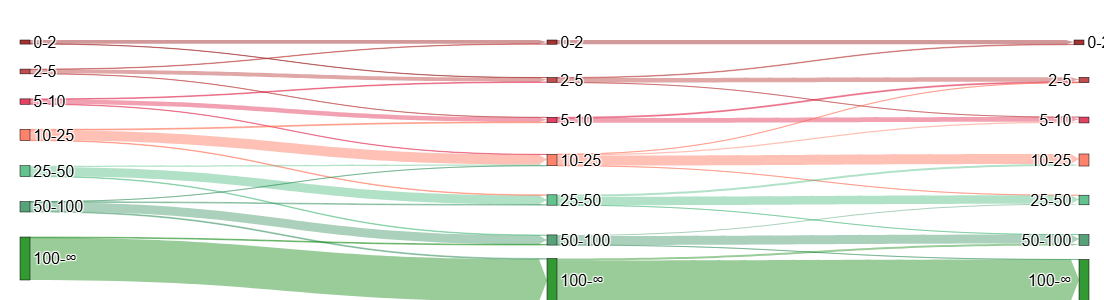

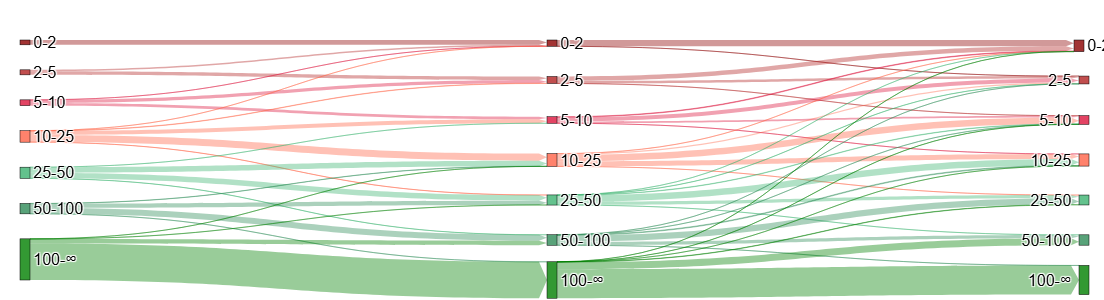

In [8]:
color_map = {
   '0-2': 'rgba(139, 0, 0, 0.8)',       # dark red
    '2-5': 'rgba(178, 34, 34, 0.8)',     # firebrick
    '5-10': 'rgba(220, 20, 60, 0.8)',    # crimson
    '10-25': 'rgba(255, 99, 71, 0.8)',   # tomato
    '25-50': 'rgba(60, 179, 113, 0.8)',  # medium sea green
    '50-100': 'rgba(46, 139, 87, 0.8)',  # sea green
    '100-∞': 'rgba(0, 128, 0, 0.8)'    # green
}
make_sankey_for_scenario('B2', 'Lower Bound', color_map)
make_sankey_for_scenario('A2', 'Upper Bound', color_map)

In [9]:
# Orca and Kaleido are not working in windows OS
# use the html in https://cloudconvert.com/html-to-png to get .png or use dash .png botton

In [10]:
# Date and time
now = datetime.datetime.now()
print(f"Date and time: {now}")

Date and time: 2025-06-10 15:38:24.163568


In [11]:
%load_ext watermark
# Print the Python version and some dependencies
%watermark -v -m -p numpy,pandas,matplotlib,seaborn,plotly

Python implementation: CPython
Python version       : 3.10.16
IPython version      : 8.34.0

numpy     : 2.2.4
pandas    : 2.2.3
matplotlib: 3.10.1
seaborn   : 0.13.2
plotly    : 6.1.2

Compiler    : MSC v.1942 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 183 Stepping 1, GenuineIntel
CPU cores   : 24
Architecture: 64bit

